In [3]:
# Example Code
#  Nearest Neighbor
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)
#  Split Iris data in train and test data
#  A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
#  Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
knn.predict(iris_X_test)
iris_y_test
                      

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [19]:
# Nearest Neighbor for Gait Mapping Generation
#  Load Dataset using Pandas
import pandas as pd 
dataset = pd.read_csv("/Users/jiayu/Desktop/GaitDiscoveryDataBase/Half_Cheetah/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/database-20191025T185400.csv") 
target = dataset["Gait"]
features = dataset
del features["Gait"]
del features["GaitNumber"]
knn.fit(features,target)
knn.predict([[1,0.9]])

array(['Galloping'], dtype=object)

Automatically created module for IPython interactive environment


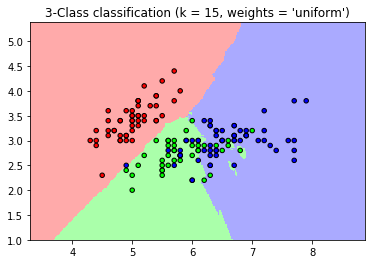

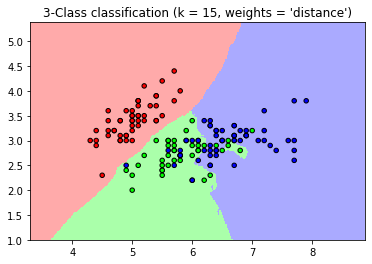

In [21]:
# A Detail Nearest Neighbors Example
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Automatically created module for IPython interactive environment
[1 2 4 5 6]
[2]
[2]


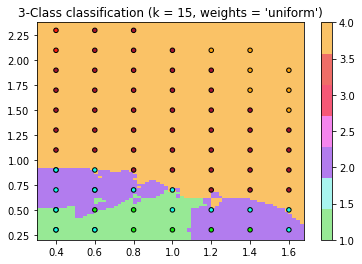

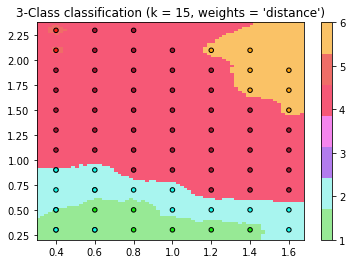

In [40]:
# Nerarest Neighbor Classification for Gait Mapping -- with plotting
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# Load data
import pandas as pd 
dataset = pd.read_csv("/Users/jiayu/Desktop/GaitDiscoveryDataBase/Half_Cheetah/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/database-20191025T185400.csv") 
y = dataset["GaitNumber"]
X = dataset
del X["Gait"]
del X["GaitNumber"]

X = X.to_numpy()
y = y.to_numpy()

print(np.unique(y))

h = .02  # step size in the mesh

# Create color maps
#                           Walking-D  Walking-S  Trotting  Galloping Bounding-S Bounding-D Pronking  
cmap_light = ListedColormap(['#97e995', '#a8f5ef', '#b27cee','#f485ed','#f65876','#ef6d67','#fac266'])
cmap_bold = ListedColormap(['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#A2142F','#fa1a0f','#f89f0d'])
#cmap_light = ListedColormap(['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#A2142F','#fa1a0f','#f89f0d'])
#cmap_bold = ListedColormap(['#97e995', '#a8f5ef', '#b27cee','#f485ed','#f65876','#ef6d67','#fac266'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    print(clf.predict([[0.6,0.75]]))
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.colorbar()

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


In [1]:
# Load Dataset using Pandas
import pandas as pd 
dataset = pd.read_csv("/Users/jiayu/Dropbox/Half_Cheetah_Gait_Discovery_Results/Boxy_Force_Limit/10_Percent_Phaselb/5_SmoothMotion_with_FixedOrientation/with_TimeIntegralCost/0_Degrees/database-20191024T192944.csv") 
target = dataset["Gait"]
data = dataset
del data["Gait"]

In [2]:
# Learn the mapping
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data[:-1], target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
data[1:]

,StridePeriod,Speed
1,0.6,2.3
2,0.8,2.3
3,1.0,2.3
4,0.4,2.1
5,0.6,2.1
...,...,...
65,0.8,0.3
66,1.0,0.3
67,1.2,0.3
68,1.4,0.3


In [9]:
# Predict
clf.predict(data[1:])

array(['Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Bounding-D',
       'Bounding-D', 'Walking-S', 'Walking-S', 'Walking-S', 'Bounding-D',
       'Bounding-D', 'Bounding-D', 'Bounding-D', 'Walking-S', 'Walking-S',
       'Walking-S', 'Walking-S', 'Walking-S', 'Bounding-D', 'Bounding-D',
       'Walking-S', 'Walking-S', 'Walking-S', 'Walking-S', 'Walking-S',
       'Walking-S', 'Walking-S', 'Walking-S', 'Walking-S', 'Walking-S',
   